# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 7</center>

# <center>Machine Learning Workflow</center>

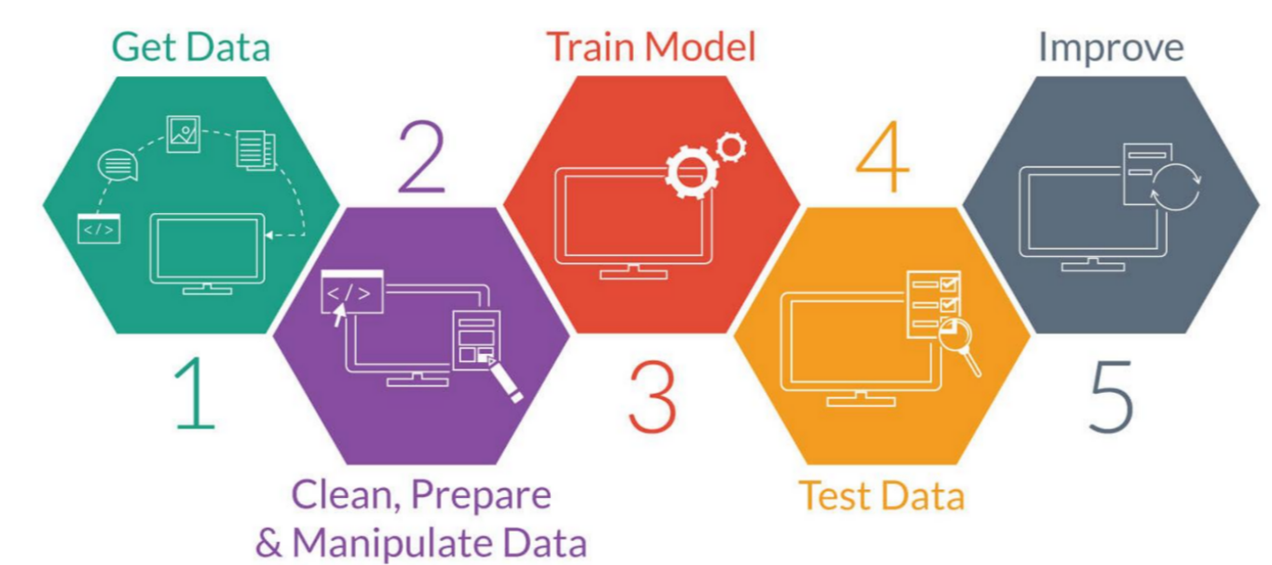

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Data Manipulation and Feature Engineering</li>
<li> Train Test Split</li>
<li> Train model </li>
<li> Test the Model</li>
<li> Make Predictions </li>
</ol>

## <font color = blue>0. Learning Objectives

Follow machine learning workflow to create machine learning model and evaluate the performance of the machine learning model.

By the end of the lab, you should be able to :
- Load dataset and perform necessary data engineering and feature engineering techniques on given dataset.


- Split given dataset into train and test set.


- Evaluate the model performance for both train and test dataset.




## <font color = blue>1. Loading Data

    - Load iris flower data from sklearn.datasets module. Create dataframe from the iris data.
    
    
### Different species of Iris Flower
!["Iris Species"](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

### Dataset and Iris Attributes

![](https://bishwamittra.github.io/images/imli/iris_dataset.png)

In [1]:
#Load your data here
#Load the iris datasets using sklearn : Note you can also d/l from UCI and read using pd.read_csv
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
# Get the detail info on the dataset
# Such as: How are the data arranged, name of the column, units, missing values
#print(iris.data)
print(iris.target)
print(iris.DESCR)
print(iris.feature_names)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= =====

In [3]:
#explore other keys in in the given data


In [21]:
#Usually I keep all the data in a Pandas dataframe.
#So we need to combine the features and targets(labels) into a single dataframe
import pandas as pd
idf = pd.DataFrame(iris.data,columns = iris.feature_names)
idf.head()
#Add the features


#Add the label (target)
idf['target'] = iris.target
idf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [13]:
#use pandas basic methods to get result
idf.shape



(150, 4)

## <font color = blue>2. Data Manipulation and Feature Engineering


In [22]:
import matplotlib.pyplot as plt
#Let's do some visualisation
import seaborn as sns
#Plot the distribution of each fetures of each class




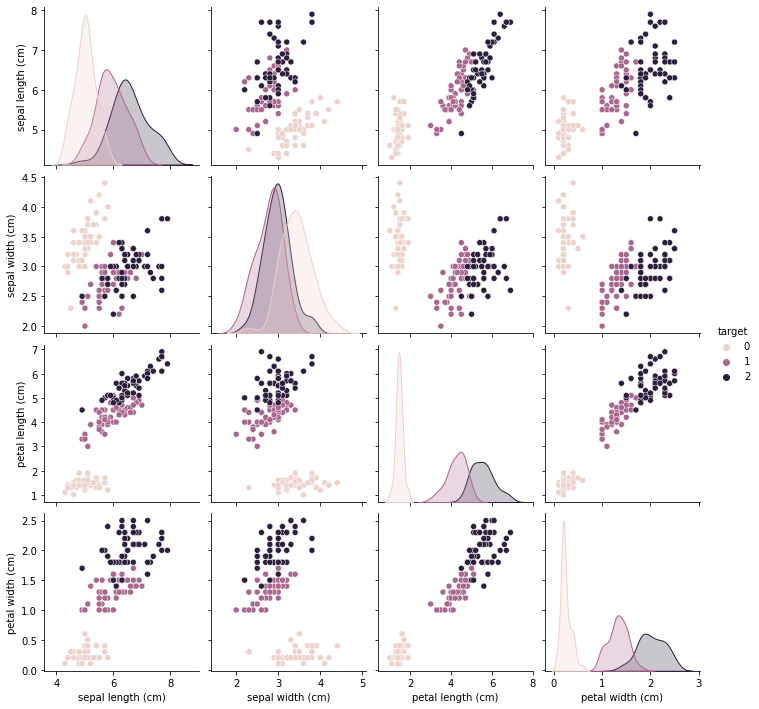

In [23]:
#use pair plot to check relation
sns.pairplot(idf, hue = 'target')



In [24]:
#Let's do correlation plot on the data to see how the each features are co-related
idf.corr()
# A high correlation can help us use dimension reduction



sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000

<AxesSubplot:>

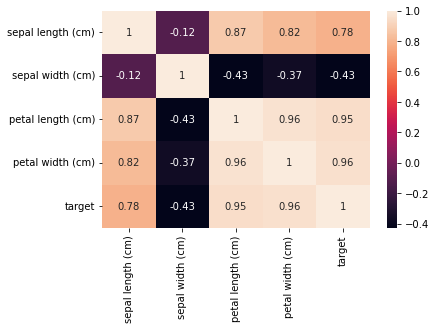

In [79]:
import seaborn as sns
sns.heatmap(idf.corr(),annot = True)

## <font color = blue>3. Split data for train and test



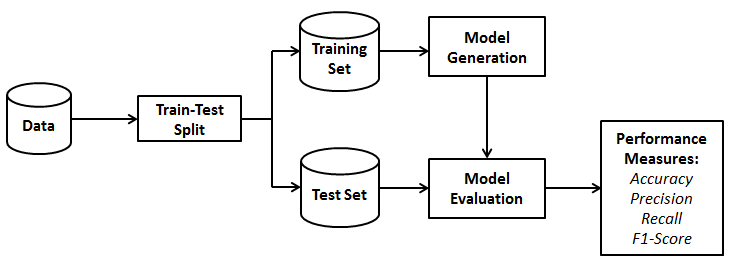

1.   Split the data to 80% training and 20% testing
2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

In [80]:
from sklearn.model_selection import train_test_split
# X contains the features, y is the label
x = idf[iris.feature_names]
x
#other ways
#x = idf.drop(['target'],axis = 1)
#x 
#x = idf.loc[:,iris.feature_names]
y = idf.target
y
#Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = 5,stratify = y)
x_train,x_test,y_train,y_test




(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 48                 5.3               3.7                1.5               0.2
 40                 5.0               3.5                1.3               0.3
 45                 4.8               3.0                1.4               0.3
 56                 6.3               3.3                4.7               1.6
 128                6.4               2.8                5.6               2.1
 ..                 ...               ...                ...               ...
 99                 5.7               2.8                4.1               1.3
 97                 6.2               2.9                4.3               1.3
 41                 4.5               2.3                1.3               0.3
 32                 5.2               4.1                1.5               0.1
 66                 5.6               3.0                4.5               1.5
 
 [120 rows x 4 columns],
      sepal length (cm)  

## <font color = blue>4. Training Model


In [81]:
#Import the estimators from the sklearn libraries
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
#Train the model
irismodel = LogisticRegression()
irismodel.fit(x_train,y_train)
#Start the training   


LogisticRegression()

## <font color = blue>5. Test Model


In [47]:
#Test out the model using some prediction
y_pred = irismodel.predict(x_test)
y_pred


array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 1])

In [45]:
y_test

36     0
27     0
38     0
105    2
93     1
141    2
9      0
16     0
80     1
94     1
8      0
39     0
86     1
118    2
53     1
124    2
111    2
129    2
47     0
61     1
35     0
92     1
127    2
133    2
57     1
14     0
148    2
122    2
51     1
95     1
Name: target, dtype: int32

In [51]:
print(118/120)

0.9833333333333333


In [52]:
y_pred_train = irismodel.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.9833333333333333

## <font color = blue>6. Model Evaluation
    
- Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses
    
    

### <font color = "blue">6.1 Accuracy Score

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.
    
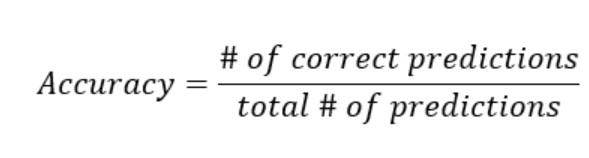

`sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)`

In [48]:
# Find accuracy score for test data.
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



0.9666666666666667

In [49]:
print(29/30)

0.9666666666666667


## <font color = blue>5. Make Predictions


In [99]:
#Use predict method to make prediction to unseen data
sepal length = 3
sepal width = 5
petal length = 5
petal width = 4
y_val = [[sepal length,sepal width,petal length,petal width]]
irismodel.prdict(y_val)



SyntaxError: invalid syntax (2557101401.py, line 2)

# TODO/ HOMEWORK


INSTRUCTIONS:

- Follow Machine learning Workflow and create model for boston housing dataset. 



- Compare train and test accuracy for the model.

In [55]:
#loading data
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [56]:
#creating dataframe
import pandas as pd
rdf = pd.DataFrame(boston.data,columns = boston.feature_names)
rdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [58]:
new_rdf = rdf[['RM','LSTAT','INDUS']]
new_rdf

RM  LSTAT  INDUS
0    6.575   4.98   2.31
1    6.421   9.14   7.07
2    7.185   4.03   7.07
3    6.998   2.94   2.18
4    7.147   5.33   2.18
..     ...    ...    ...
501  6.593   9.67  11.93
502  6.120   9.08  11.93
503  6.976   5.64  11.93
504  6.794   6.48  11.93
505  6.030   7.88  11.93

[506 rows x 3 columns]

In [59]:
new_rdf['target'] = boston.target
new_rdf.head()

RM  LSTAT  INDUS  target
0  6.575   4.98   2.31    24.0
1  6.421   9.14   7.07    21.6
2  7.185   4.03   7.07    34.7
3  6.998   2.94   2.18    33.4
4  7.147   5.33   2.18    36.2

In [60]:
new_rdf.shape

(506, 4)

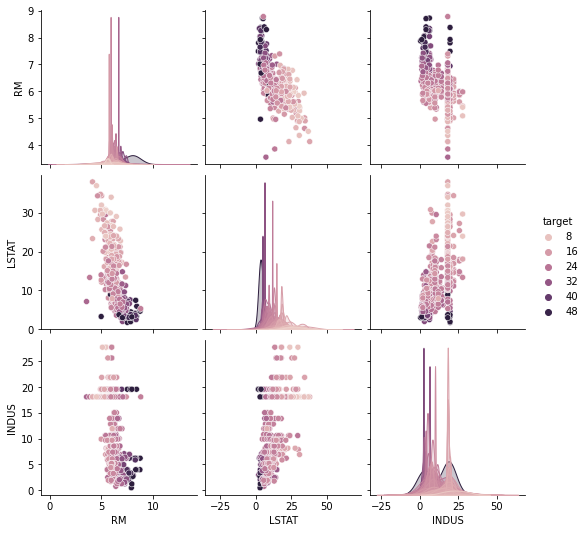

In [61]:
import seaborn as sns
sns.pairplot(new_rdf,hue = 'target')

In [62]:
new_rdf.corr()

RM     LSTAT     INDUS    target
RM      1.000000 -0.613808 -0.391676  0.695360
LSTAT  -0.613808  1.000000  0.603800 -0.737663
INDUS  -0.391676  0.603800  1.000000 -0.483725
target  0.695360 -0.737663 -0.483725  1.000000

<AxesSubplot:>

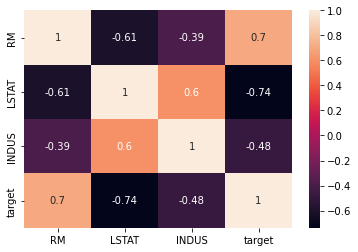

In [63]:
sns.heatmap(new_rdf.corr(),annot = True)

In [86]:
#split data for training data and test data
from sklearn.model_selection import train_test_split
a = new_rdf.drop(['target'],axis = 1)
a

RM  LSTAT  INDUS
0    6.575   4.98   2.31
1    6.421   9.14   7.07
2    7.185   4.03   7.07
3    6.998   2.94   2.18
4    7.147   5.33   2.18
..     ...    ...    ...
501  6.593   9.67  11.93
502  6.120   9.08  11.93
503  6.976   5.64  11.93
504  6.794   6.48  11.93
505  6.030   7.88  11.93

[506 rows x 3 columns]

In [87]:
b = new_rdf.target
b

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [88]:
#split
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size = 0.2,random_state=3)
a_train,a_test,b_train,b_test

(        RM  LSTAT  INDUS
 454  6.728  18.71  18.10
 471  6.229  12.87  18.10
 281  6.968   4.59   3.33
 477  5.304  24.91  18.10
 107  6.127  14.09   8.56
 ..     ...    ...    ...
 440  5.818  22.11  18.10
 131  6.326  12.26  21.89
 249  6.718   6.56   5.86
 152  5.012  12.12  19.58
 362  5.362  10.19  18.10
 
 [404 rows x 3 columns],
         RM  LSTAT  INDUS
 224  8.266   4.14   6.20
 137  6.454  14.59  21.89
 453  7.393  16.74  18.10
 303  6.982   4.86   6.09
 254  6.108   6.57   3.64
 ..     ...    ...    ...
 434  6.208  15.17  18.10
 294  6.009  10.40  13.92
 306  7.420   6.47   2.18
 463  6.513  10.29  18.10
 332  6.031   7.83   6.06
 
 [102 rows x 3 columns],
 454    14.9
 471    19.6
 281    35.4
 477    12.0
 107    20.4
        ... 
 440    10.5
 131    19.6
 249    26.2
 152    15.3
 362    20.8
 Name: target, Length: 404, dtype: float64,
 224    44.8
 137    17.1
 453    17.8
 303    33.1
 254    21.9
        ... 
 434    11.7
 294    21.7
 306    33.4
 463    20.2
 332 

In [89]:
#train model
#Import the estimators from the sklearn libraries
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
#Train the model
bostonmodel = LinearRegression()
bostonmodel.fit(a_train,b_train)

LinearRegression()

In [90]:
#test model
#Test out the model using some prediction
Y_pred = bostonmodel.predict(a_test)
Y_pred

array([37.63232728, 21.23371228, 24.81883096, 31.05019666, 26.06754658,
       23.3006344 , 19.27229751,  8.8970699 , 24.80685959, 11.91040868,
        9.29956795, 29.75192441, 33.40953252, 25.49237622,  9.54627132,
        9.54542298, 22.53716922, 16.03273213, 16.26853068, 25.96660394,
       30.00649038, 34.07556685, 26.05469766, 25.47182339, 12.68596064,
       28.15252059, 18.79223868, 16.41531761, 23.38905156, 22.19242198,
       18.97483813, 32.72844649, 21.39193755, 24.61256099, 16.33898835,
       17.37780034, 25.66230088, 32.92221611, 23.21336576, 26.78397351,
       17.16073423,  8.18201196, 17.59091016, 19.88024841, 22.09357878,
       28.17964222, 20.63734502, 11.66862616, 29.09637065, 21.65323214,
       30.68691268, 22.90575013, 35.98807346, 18.33446923, 21.87261762,
        9.9029064 , 35.01506651, 17.47534954, 29.81924894, 22.4375561 ,
       20.32729569, 23.29648418, 31.27566352, 31.24472438, 22.97576351,
       24.93661304, 33.26230169, 24.21004822, 29.68604173, 27.23

In [101]:
b_test

224    44.8
137    17.1
453    17.8
303    33.1
254    21.9
       ... 
434    11.7
294    21.7
306    33.4
463    20.2
332    19.4
Name: target, Length: 102, dtype: float64

In [92]:
#evaluation
# Find r2score for test data.
from sklearn.metrics import r2_score
r2_score(b_test,Y_pred)

0.7019405174428994

In [93]:
Y_pred_train = bostonmodel.predict(a_train)
r2_score(b_train,Y_pred_train)

0.6237315531841986

In [94]:
#MAKE PREDICTIONS
RM = 7
LSTAT = 5
INDUS = 7

x_val = [[RM,LSTAT,INDUS]]
bostonmodel.predict(x_val)

array([30.96747361])